In [1]:
import pandas as pd
import numpy as np
df= pd.read_csv(r'C:\Users\mssre\Desktop\datas\Terrorism.csv')
df.head()

C:\Users\mssre\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [44]:
print(df.info())
print(df.isna().sum())
print(df.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB
None
eventid            0
iyear              0
imonth             0
iday               0
approxdate    172452
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       156653
Length: 135, dtype: int64
Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)


0         Central America & Caribbean
1                       North America
2                      Southeast Asia
3                      Western Europe
4                           East Asia
                     ...             
181686             Sub-Saharan Africa
181687     Middle East & North Africa
181688                 Southeast Asia
181689                     South Asia
181690                 Southeast Asia
Name: region_txt, Length: 181691, dtype: object

In [18]:
df[df["country_txt"]=="Canada"]["country"].count()

96

In [19]:
a=[]
con= df["country_txt"].unique()
for i in con:
    b= df[df["country_txt"]==i]["country"].count()
    a.append(b)
print(a)

[90, 524, 6908, 1275, 402, 2836, 82, 1565, 38, 190, 2050, 293, 541, 111, 113, 3249, 273, 2479, 815, 2478, 307, 4292, 114, 684, 5235, 8306, 314, 1970, 130, 154, 96, 114, 14368, 62, 132, 67, 2, 259, 2183, 39, 50, 127, 76, 2227, 115, 10, 11960, 2693, 1, 6, 50, 4, 140, 2743, 5320, 3849, 213, 967, 36, 132, 546, 12731, 6096, 2365, 323, 203, 220, 20, 99, 7, 10, 36, 91, 6, 1, 2201, 38, 22, 2016, 683, 24636, 4142, 59, 3022, 151, 5, 3907, 3, 22, 1648, 499, 18, 371, 22, 761, 23, 83, 78, 41, 5, 26, 363, 109, 394, 19, 29, 8, 2249, 207, 26, 118, 101, 25, 5, 1, 8, 56, 12, 1, 80, 283, 2, 3, 7, 52, 66, 16, 16, 4, 7, 1, 52, 31, 6, 154, 1215, 48, 20, 17, 19, 22, 2, 46, 27, 89, 252, 34, 36, 566, 735, 3347, 159, 101, 332, 30, 57, 217, 49, 27, 8, 613, 1709, 21, 24, 2194, 74, 27, 1, 159, 2, 188, 5, 21, 17, 16, 12, 5, 8, 18, 118, 1, 13, 32, 6, 3, 1, 10, 2, 3, 33, 35, 2, 775, 196, 4, 10, 1, 9, 5, 1, 2, 11, 6, 12, 225]


In [25]:
new_df= pd.DataFrame({'country':con,'No.of Terror Attacks':a},columns=['country','No.of Terror Attacks'])
new_df.head()

,country,No.of Terror Attacks
0,Dominican Republic,90
1,Mexico,524
2,Philippines,6908
3,Greece,1275
4,Japan,402


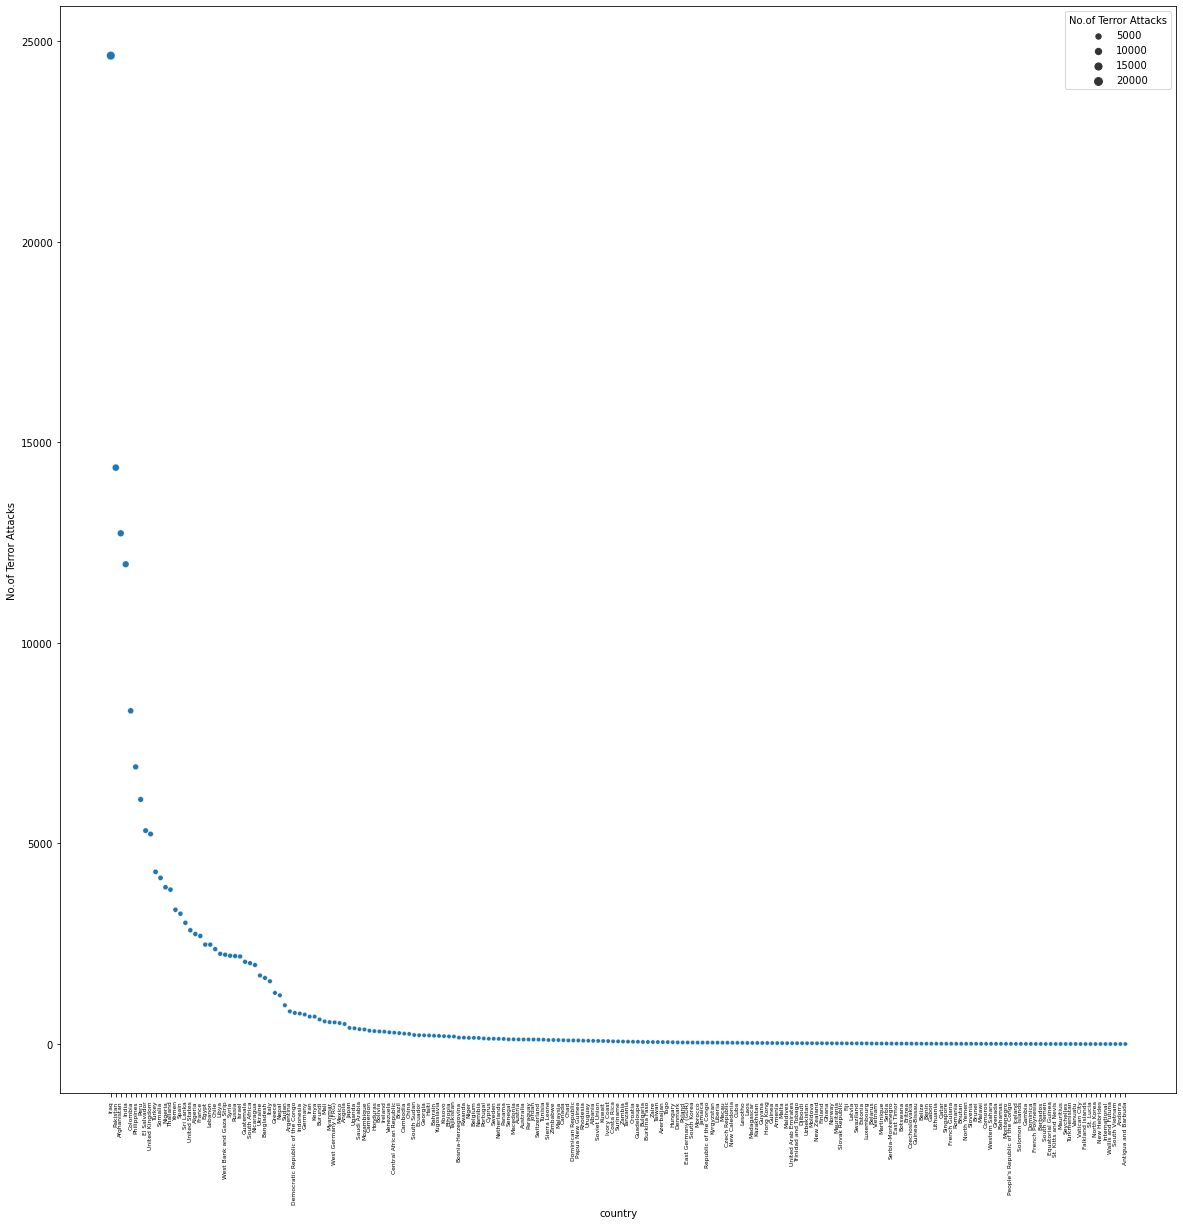

In [97]:
#Terror counts accross country
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20,20))
sns.scatterplot(y="No.of Terror Attacks",x="country",data=new_df,size="No.of Terror Attacks")
plt.xticks(rotation=90,size=6)
plt.show()

In [37]:
new_df.sort_values("No.of Terror Attacks",ascending=False,inplace=True)
top_10= new_df.head(10)
top_10.set_index("country")

,No.of Terror Attacks
country,
Iraq,24636
Pakistan,14368
Afghanistan,12731
India,11960
Colombia,8306
Philippines,6908
Peru,6096
El Salvador,5320
United Kingdom,5235


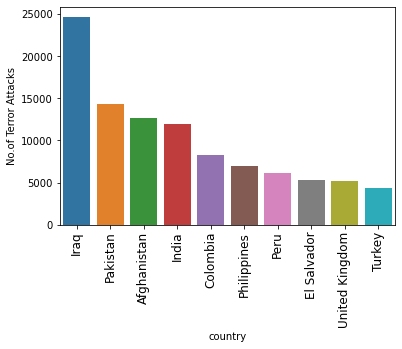

In [41]:
#hot spots for terrorism since 1970
sns.barplot(y="No.of Terror Attacks",x="country",data=top_10)
plt.xticks(rotation=90,size=12)
plt.show()

In [53]:
kill = df.loc[:,'nkill']
attack= df.loc[:,'attacktype1':'attacktype1_txt']
kill_type = pd.concat([attack, kill], axis=1)
typeKillFormatData = kill_type.pivot_table(columns='attacktype1_txt', values='nkill', aggfunc='sum')
typeKillFormatData


attacktype1_txt,Armed Assault,Assassination,Bombing/Explosion,Facility/Infrastructure Attack,Hijacking,Hostage Taking (Barricade Incident),Hostage Taking (Kidnapping),Unarmed Assault,Unknown
nkill,160297.0,24920.0,157321.0,3642.0,3718.0,4478.0,24231.0,880.0,32381.0


In [95]:
labels = typeKillFormatData.columns.tolist() 
tex = typeKillFormatData.T 
values = tex.values.tolist()
kills= pd.DataFrame({'assault':labels,'count':values})
kills

,assault,count
0,Armed Assault,[160297.0]
1,Assassination,[24920.0]
2,Bombing/Explosion,[157321.0]
3,Facility/Infrastructure Attack,[3642.0]
4,Hijacking,[3718.0]
5,Hostage Taking (Barricade Incident),[4478.0]
6,Hostage Taking (Kidnapping),[24231.0]
7,Unarmed Assault,[880.0]
8,Unknown,[32381.0]
